In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gold=pd.read_csv('GOLD.csv') 
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
gold.dtypes

Date         object
Price         int64
Open          int64
High          int64
Low           int64
Vol.         object
Change %     object
Pred        float64
new         float64
dtype: object

In [5]:
gold.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [6]:
gold['Date']=pd.to_datetime(gold['Date'])
gold=gold.set_index('Date')

In [7]:
gold_new=gold.dropna()

In [8]:
gold_new.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

In [9]:
gold_new.dtypes

Price         int64
Open          int64
High          int64
Low           int64
Vol.         object
Change %     object
Pred        float64
new         float64
dtype: object

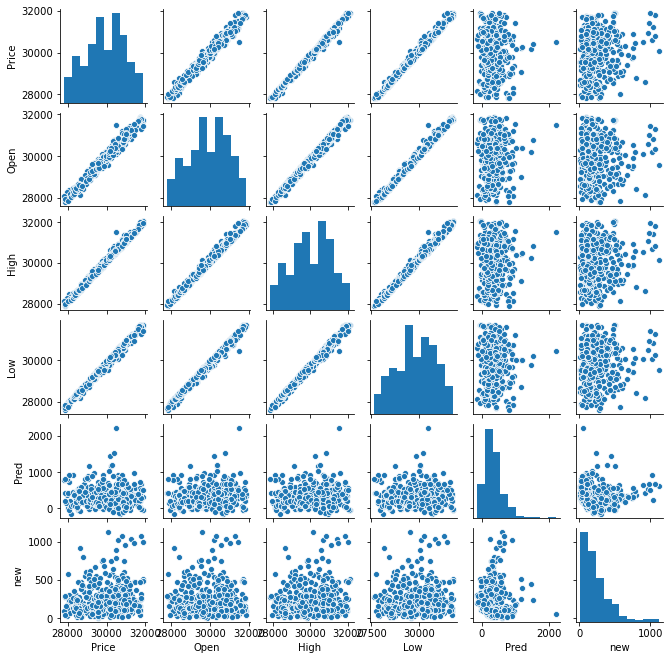

In [10]:
sns.pairplot(gold_new,height=1.5)

In [11]:
gold_new.corr()

,Price,Open,High,Low,Pred,new
Price,1.000000,0.987029,0.995279,0.995058,0.040489,0.158262
Open,0.987029,1.000000,0.993764,0.994031,0.109153,0.025526
High,0.995279,0.993764,1.000000,0.993850,0.080394,0.130755
Low,0.995058,0.994031,0.993850,1.000000,0.014411,0.066309
Pred,0.040489,0.109153,0.080394,0.014411,1.000000,-0.006109
new,0.158262,0.025526,0.130755,0.066309,-0.006109,1.000000


In [12]:
gold_new=gold_new.drop(columns=['Vol.','Change %'])

In [14]:
# Finding the coefficients of inputs using linear regression

X=gold_new.iloc[:,0:4].values
y1=gold_new.iloc[:,-2].values

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin1=LinearRegression()

lin1.fit(X,y1)

LinearRegression()

In [15]:
lin1.coef_

array([ 2.,  3., -1., -4.])

In [17]:
lin1.intercept_

-2.6716406864579767e-12

In [18]:
lin1.score(X,y1)

1.0

In [19]:
# fill the incomplete column 'Pred'

gold['Pred']=lin1.predict(gold.loc[:,['Price','Open','High','Low']].values)

gold.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

In [20]:
# Fitting the other column using new regression model 

y2=gold_new.iloc[:,-1].values

lin2=LinearRegression()

lin2.fit(X,y2)


LinearRegression()

In [21]:
lin2.coef_

array([ 1.01202641, -1.00094252,  1.00492221, -1.01604305])

In [22]:
lin2.intercept_

-0.21616304415610443

In [23]:
lin2.score(X,y2)

0.9999941203360704

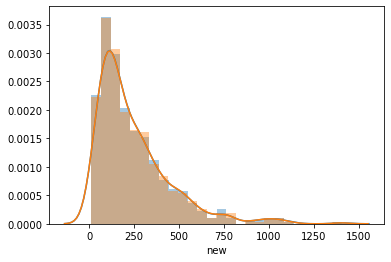

In [24]:
# Checking the accuracy of prediction

X_test=gold.iloc[:,0:4].values
y_test=gold.iloc[:,-1]

y2_test_pred=lin2.predict(X_test)

r2_score(y_test,y2_test_pred)

sns.distplot(y_test)
sns.distplot(y2_test_pred)


In [25]:
#Linear regression analysis for daily returns

gail=pd.read_csv('GAIL.csv')
gail['Date']=pd.to_datetime(gail['Date'])
gail=gail.set_index('Date')

gail['Series'].value_counts()

nif=pd.read_csv('Nifty50.csv')
nif['Date']=pd.to_datetime(nif['Date'])
nif=nif.set_index('Date')

gail['Daily_return']=gail['Close Price'].pct_change()*100
gail=gail.dropna()

nif['Daily_return']=nif['Close'].pct_change()*100
nif=nif.dropna()

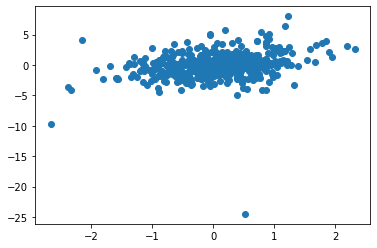

In [26]:
plt.scatter(nif['Daily_return'],gail['Daily_return'])

In [27]:
X=nif['Daily_return'].iloc[-1:-91:-1].sort_index()
X=X.values.reshape(-1,1)

y=gail['Daily_return'].iloc[-1:-91:-1].sort_index()
y=y.values


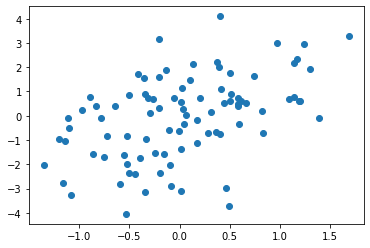

In [28]:
plt.scatter(X,y)

In [31]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

lin.fit(X,y)


LinearRegression()

In [32]:
lin.coef_

array([1.19009436])

In [33]:
lin.intercept_

-0.1010538702836323

In [34]:
lin.score(X,y)

0.22579128741982024

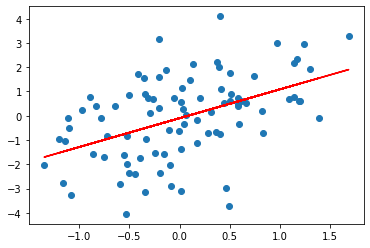

In [35]:
y_pred=lin.predict(X)

plt.scatter(X,y)
plt.plot(X,y_pred,color='r')

In [ ]:
# The Beta value found for daily return is 1.19 which is greater than 1
# Hence we can say that daily return of gail's stocks is more volatile than daily market return by 19% 

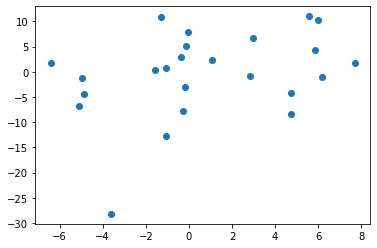

In [36]:
#Linear regression analysis for Monthly returns

gail_month=gail.resample('M').apply(lambda x:x[-1])

nif_month=nif.resample('M').apply(lambda x:x[-1])

gail_month['Monthly_return']=gail_month['Close Price'].pct_change()*100

nif_month['Monthly_return']=nif_month['Close'].pct_change()*100


gail_month=gail_month.dropna()
nif_month=nif_month.dropna()


plt.scatter(nif_month['Monthly_return'],gail_month['Monthly_return'])

In [37]:
X=nif_month['Monthly_return'].values.reshape(-1,1)
y=gail_month['Monthly_return'].values

from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X,y)


LinearRegression()

In [38]:
lin.coef_

array([0.71244344])

In [39]:
lin.intercept_

-1.022389661258532

In [40]:
lin.score(X,y)

0.11579516385324784

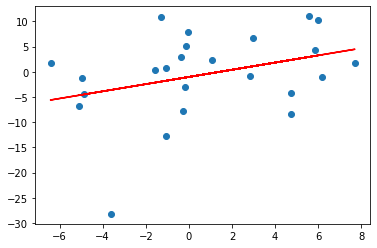

In [41]:
y_pred=lin.predict(X)

plt.scatter(X,y)
plt.plot(X,y_pred,'r')

In [ ]:
# The Beta value found for monthly return is 0.712 which is less than 1
# Hence we can say that monthly return of gail's stocks is less volatile than monthly market return by 29%